In [1]:
import pandas as pd 
import string
import numpy as np
import sklearn as sk
import tensorflow as tf
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertModel, BertConfig, TFBertForSequenceClassification

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
cwd = os.getcwd()
datapath = os.path.join(cwd, 'dataset')

In [3]:
df = pd.read_csv(os.path.join(datapath, 'df_processed.csv'))
df['berita'] = df['berita'].apply(lambda x : " ".join(eval(x)))
# df['berita'] = df['berita'].apply(lambda x : eval(x))

df.head()

,Unnamed: 0,berita,label
0,0,gunung agung erupsi pertama kali november letu...,0
1,1,jakarta cnn indonesia menteri bumn erick thohi...,0
2,2,dosen fakultas dokter hewan ipb yusuf ridwan n...,0
3,3,jakarta anggota tni serda n serda da tusuk ora...,0
4,4,aku tembak jatuh pesawat ukraina iran tuai gel...,0


In [4]:
df['berita'][0]

'gunung agung erupsi pertama kali november letus jadi pukul wita asap tekan sedang warna kelabu tebal tinggi maksimum m atas puncak abu letus tiup lemah arah timurtenggara masyarakat minta tetap tenang selalu ikut rekomendasi pvmbg gunung agung letak kabupaten karangasem provinsi bal kembali erupsi sabtu november pukul wita abu tekan sedang setinggi m keluar atas puncak gunung agung rupa erupsi kepala pusat data informasi humas badan nasional tanggulang bencana bnpb sutopo purwo nugroho kata erupsi cara visual daerah culik batulompeh arah barat barat daya asap kelabukehitaman tekan sedang tutur status gunung agung tetap siaga level hingga kemudian pusat vulkanologi mitigasi bencana geologi pvmbg naik status gunung agung siaga level jadi awas level senin november jumlah ungsi akibat erupsi gunung agung capai jiwa asal wilayah masuk zona bahaya aktivitas gunung agung bal terus tingkat akibat bandara i gusti ngurah rai tutup communication and legal section bandara i gusti ngurah rai arie 

In [5]:
X = df['berita']
y = df['label']

X.shape, y.shape

((2198,), (2198,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
X_train.shape, X_test.shape

((1758,), (440,))

In [7]:
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-large-p1', do_lower_case=True)

In [8]:
tokenizer.convert_tokens_to_ids(df['berita'][0])

1

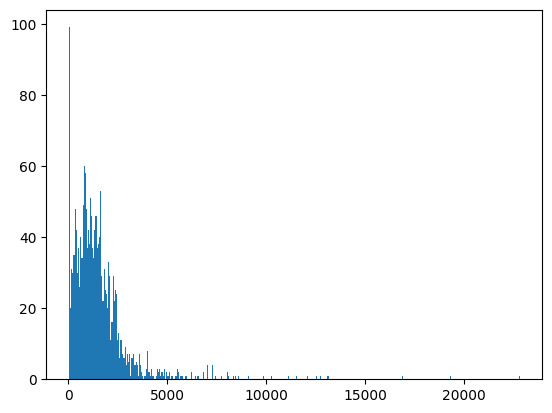

In [9]:
plt.hist([len(x) for x in df['berita']], bins=500)
plt.show()

In [10]:
print('Total berita', len(df), '|| Berita terpanjang ', max([len(x) for x in df['berita']]), ' kata')
print('Total berita dengan <= 5 kata ', sum([1 for x in df['berita'] if len(x) <= 5]))
print('Total berita dengan > 1000 kata ', sum([1 for x in df['berita'] if len(x) > 1000]))

Total berita 2198 || Berita terpanjang  22798  kata
Total berita dengan <= 5 kata  0
Total berita dengan > 1000 kata  1299


In [11]:
def mask_input_for_bert(news, max_len):
    input_ids = []
    attention_masks = []
    i = 0
    for new in news:
        if (i < 3):
            print("Berita", new)
        encoded_dict = tokenizer.encode_plus(
            new,
            add_special_tokens = True,
            max_length = max_len,
            pad_to_max_length = True,
            return_attention_mask = True,
        )
        if (i < 3):
            print('dict', encoded_dict['input_ids'])
            
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
        
        i += 1
        
    input_ids = tf.convert_to_tensor(input_ids)
    attention_masks = tf.convert_to_tensor(attention_masks)
    return input_ids, attention_masks
            

In [12]:
max_len = 1000
X_train_inp, X_train_mask = mask_input_for_bert(X_train, max_len)
X_test_inp, X_test_mask = mask_input_for_bert(X_test, max_len)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Berita orang reddit unggah foto ambil piala dunia minggu oleh fotografer ap frank augstein terang ap dapat temu shutterstock cukup mudah identifikasi orangorang foto bagai gemar tunggu tanding spanyol iran rusia reddit mata elang sama banyak orang lihat detail penting wanita foto id kena wanita kena jilbab foto ambil tanding tutup kepala bisa temu lengkap jelas referensi kategori klarifikasi sumber tanya salah satu anggota fafhh jelas ap singkat associated press about us the definitive source for news the associated press is an independent notforprofit news cooperative headquartered in new york city our teams in over countries tell the worlds stories from breaking news to investigative reporting we provide content and services to help engage audiences worldwide working with companies of all types from broadcasters to brands referensi yahoocom foto wanita iran tonton piala dunia hijab jadi viral meghan demaria gaya hidup yahoo juni foto gemar sepak bola iran piala dunia kazan rusia foto

C:\Users\LENOVO\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Berita dokter sehat pakar sehat gizi nama inge permadhi sebut sengaja tel biji jambu biji cabai nyata masalah usus buntu banyak orang memang pikir keras macam biji masalah sehat picu rasa sakit luar biasa perut sebut padahal masalah usus buntu justru lebih sering kurang asupan air putih tiap hari lengkap jelas referensi kategori klarifikasi sumber tanya salah satu anggota fafhh post akun drynt trsnani sau facebookcomdryantisakun kali per tangkap layar buat narasi info sehat alam pribadi cegah lebih baik obat usus buntu bukan biji cabe biji jambu nyata justru kena usus buntu sering sepele lengkap bagi referensi jelas klikdokter tahu makan biji jambu usus buntu tahu mitos nih simak apa kata dr adithia kwee sini lengkap bagi referensi kompas bukan cabai jambu biji picu radang usus buntu lengkap bagi referensi dokter sehat pakar sehat gizi nama inge permadhi sebut sengaja tel biji jambu biji cabai nyata masalah usus buntu banyak orang memang pikir keras macam biji masalah sehat picu rasa s

In [30]:
y_train_label = np.expand_dims(y_train, axis=1)
y_train_label = tf.convert_to_tensor(y_train_label)
y_test_label = np.expand_dims(y_test, axis=1)
y_test_label = tf.convert_to_tensor(y_test_label)

X_train_inp.shape, X_train_mask.shape, y_train_label.shape

(TensorShape([1758, 1000]), TensorShape([1758, 1000]), TensorShape([1758, 1]))

In [15]:
bert_model = TFBertForSequenceClassification.from_pretrained('indobenchmark/indobert-large-p1', num_labels = 1)
# bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-large-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
log_dir = cwd
model_save_path = os.path.join(cwd, 'indobert_model.h5')

callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path,
                                               save_weights_only = True,
                                               monitor = 'val_loss',
                                               mode = 'min',
                                               save_best_only = True),
            tf.keras.callbacks.TensorBoard(log_dir = log_dir)]
print('\nBert Model', bert_model.summary())

loss = tf.keras.losses.BinaryCrossentropy(from_logits = True)
metric = tf.keras.metrics.BinaryAccuracy('accuracy')
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=2e-5, epsilon=1e-08)

bert_model.compile(loss=loss, optimizer=optimizer, metrics=[metric])


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  335141888 
                                                                 
 dropout_73 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1025      
                                                                 
Total params: 335142913 (1.25 GB)
Trainable params: 335142913 (1.25 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Bert Model None


In [31]:
history=bert_model.fit([X_train_inp, X_train_mask],
                      y_train_label,
                      batch_size = 32,
                      epochs = 4,
                      validation_data=([X_test_inp, X_test_mask], y_test_label),
                      callbacks=callbacks),

Epoch 1/4


InvalidArgumentError: Graph execution error:

Detected at node tf_bert_for_sequence_classification/bert/embeddings/Gather_1 defined at (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\runpy.py", line 197, in _run_module_as_main

  File "C:\Users\LENOVO\anaconda3\lib\runpy.py", line 87, in _run_code

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\LENOVO\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever

  File "C:\Users\LENOVO\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once

  File "C:\Users\LENOVO\anaconda3\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 418, in do_execute

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code

  File "C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1716\3648297071.py", line 1, in <module>

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\transformers\modeling_tf_utils.py", line 1638, in train_step

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\transformers\modeling_tf_utils.py", line 1557, in run_call_with_unpacked_inputs

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 1569, in call

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\transformers\modeling_tf_utils.py", line 1557, in run_call_with_unpacked_inputs

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 780, in call

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\LENOVO\anaconda3\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 215, in call

indices[0,945] = 945 is not in [0, 512)
	 [[{{node tf_bert_for_sequence_classification/bert/embeddings/Gather_1}}]] [Op:__inference_train_function_45960]